In [155]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)




In [40]:
#Pandas read.
path="/var/AB_NYC_2019.csv"
df = pd.read_csv(path)



In [41]:
#DataFrame shape check
df.shape

(36334, 16)

In [42]:
#DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36334 entries, 0 to 36333
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36334 non-null  int64  
 1   name                            36318 non-null  object 
 2   host_id                         36334 non-null  int64  
 3   host_name                       36313 non-null  object 
 4   neighbourhood_group             36333 non-null  object 
 5   neighbourhood                   36333 non-null  object 
 6   latitude                        36333 non-null  float64
 7   longitude                       36333 non-null  float64
 8   room_type                       36333 non-null  object 
 9   price                           36333 non-null  float64
 10  minimum_nights                  36333 non-null  float64
 11  number_of_reviews               36333 non-null  float64
 12  last_review                     

In [43]:
#DateFrame Columns.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [44]:
#df index

df.index

RangeIndex(start=0, stop=36334, step=1)

In [47]:
#df isnull().value.counts().any() #burada değerlerde herhangi bir eksik varmı diye sorduk.

df.isnull().value_counts().any()

True

In [50]:
#df.isnull().sum()  #eksik değerin kaçar tane olduğunu görmek istedik.

df.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       5802
reviews_per_month                 5802
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [71]:
#tip bilgisine göre kategorik değişkenleri bulmak için bir fonksiyon oluşturuyorum listcomprehension olarak.

categorical_cols = [col for col in df.columns if str(df[col].dtypes) in["category","object","bool"]]

categorical_cols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [85]:
#tipi int yada float olup belirli bir sayıdan küçük olup numerik gibi olup kategorik olanları ayrı ayırıyorum ve boş olduğunu gördüm.

numerical_but_categorical = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"] ]
numerical_but_categorical

[]

In [78]:
#kategorik olarak sınıf sayısı yüksek değerlere kardinaliti si yüksek değerler deriz çoğu zaman bu değeleri ölçüm değeri taşımayacak kadar yada açıklanmayacak kadar fazla
#sınıfı vardır stunlardaki eşsiz sınıf değer sayısı yüksek olduğu için aynı zamanda dosya büyüklüğüde fazla olacağı için bu değerlere sıcak bakılmaz.

categorical_but_cardinality = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]
categorical_but_cardinality

['name', 'host_name', 'neighbourhood', 'last_review']

In [80]:
#categorical_cols

categorical_cols = categorical_cols + numerical_but_categorical
categorical_cols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [112]:
#numerical cols


numerical = [col for col in df.columns if col not in categorical_cols]
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [172]:
#burada ise ev id enlem boylam fiyat gibi diğer sayısal sutunları görüyoruz.
df[numerical].value_counts().head() #ilk 5 ev

#minimum bir gecelik olan fiyatları ise ortalama olan evlerin yorum sayısı daha fazla diyebiliriz.
#aynı şekilde aylık olarak incelenme oranının yüksek olduğunu görebiliriz pahalı evlere yorum ve inceleme düşük.

id        host_id    latitude  longitude  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
2539      2787       40.64749  -73.97237  149.0  1.0             9.0                0.21               6.0                             365.0               1
19660327  68762417   40.79222  -73.94607  125.0  1.0             1.0                1.00               4.0                             87.0                1
19670522  17555570   40.66886  -73.92333  62.0   1.0             69.0               2.83               12.0                            65.0                1
19670506  134107066  40.77744  -73.95476  117.0  3.0             8.0                0.33               1.0                             0.0                 1
19670499  17555570   40.66958  -73.92361  52.0   1.0             74.0               3.04               12.0                            68.0                1
dtype: int64

In [131]:
#Oda tiplerine göre ortalama fiyatları.
df.groupby("room_type").agg({"price":"mean"})


,price
room_type,
Entire home/apt,202.518933
Private room,87.252710
Shared room,76.251748


In [146]:
#enlem ve boylama göre ilk on evin fiyatları.
df_llp =df.groupby(["latitude", "longitude"]).agg({"price" : "mean" }).head(10)
df_llp

,,price
latitude,longitude,
40.49979,-74.24084,110.0
40.50708,-74.24285,100.0
40.50868,-74.23986,299.0
40.50873,-74.23914,85.0
40.51133,-74.23803,275.0
40.52211,-74.18028,185.0
40.52700,-74.20941,118.0
40.53871,-74.16966,180.0
40.53884,-74.19826,700.0


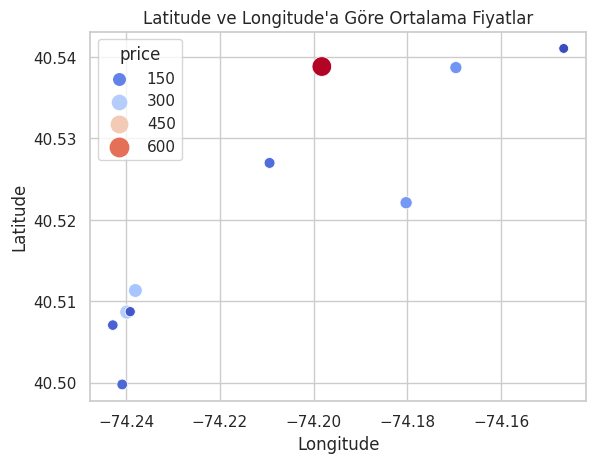

In [169]:
#Latitude ve Longitude'a Göre Ortalama Fiyatlar (ilk 10 ev.)
sns.scatterplot(data=df_llp, x="longitude", y="latitude", hue="price", palette="coolwarm", size="price", sizes=(50, 200))
plt.title("Latitude ve Longitude'a Göre Ortalama Fiyatlar")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


In [160]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

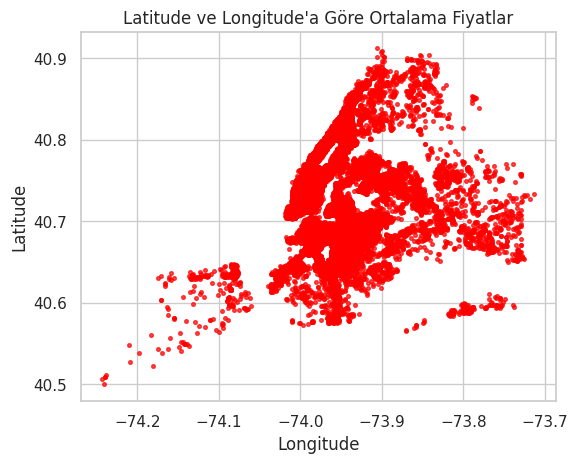

In [171]:
# Harita üzerinde nokta grafiği oluşturma
gdf.plot(marker='o', color='red', markersize=7, alpha=0.7)

# Grafik başlığı ekleme
plt.title("Latitude ve Longitude'a Göre Ortalama Fiyatlar")

# Eksen etiketlerini belirleme
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Haritayı görselleştirme
plt.show()

#latitude = 40.6 - 40.8  & longitude -74.0 - 73.9 aralığındaki boyutundaki evlerin yoğun olduğunu söyleyebiliriz.
